
## simple imputer day -36


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [91]:
df= pd.read_csv('titanic.csv',usecols=['Survived', 'Age', 'SibSp',
       'Parch', 'Fare', ])

In [92]:
df['Family']= df['SibSp']+df['Parch']

In [93]:
df

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,NaN,0
3,1,35.0,1,0,NaN,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
518,1,36.0,1,0,26.0000,1
519,0,32.0,0,0,7.8958,0
520,1,30.0,0,0,93.5000,0
521,0,22.0,0,0,7.8958,0


In [94]:
d =df[['Age','Family','Fare','Survived']]

In [95]:
d

,Age,Family,Fare,Survived
0,22.0,1,7.2500,0
1,38.0,1,71.2833,1
2,26.0,0,NaN,1
3,35.0,1,NaN,1
4,35.0,0,8.0500,0
...,...,...,...,...
518,36.0,1,26.0000,1
519,32.0,0,7.8958,0
520,30.0,0,93.5000,1
521,22.0,0,7.8958,0


In [96]:
d.isnull().sum()

Age         107
Family        0
Fare          5
Survived      0
dtype: int64

In [97]:
d.isnull().mean()*100

Age         20.458891
Family       0.000000
Fare         0.956023
Survived     0.000000
dtype: float64

In [98]:
d

,Age,Family,Fare,Survived
0,22.0,1,7.2500,0
1,38.0,1,71.2833,1
2,26.0,0,NaN,1
3,35.0,1,NaN,1
4,35.0,0,8.0500,0
...,...,...,...,...
518,36.0,1,26.0000,1
519,32.0,0,7.8958,0
520,30.0,0,93.5000,1
521,22.0,0,7.8958,0


In [99]:
x=d.iloc[:,[0,1,2]]
y=d.iloc[:,-1]

In [100]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [101]:
x_train.shape,y_train.shape,y_test.shape,x_test.shape

((418, 3), (418,), (105,), (105, 3))

In [102]:
Age_mean = x_train['Age'].mean()
age_median =x_train['Age'].median()


fare_mean = x_train['Fare'].mean()
fare_median=x_train['Fare'].median()

In [103]:
x_train['age median']= x_train['Age'].fillna(round(Age_mean))
x_train['age mean']=x_train['Age'].fillna(round(Age_mean))

x_train['fare mean']=x_train['Fare'].fillna(fare_mean)
x_train['fare median']=x_train['Fare'].fillna(fare_median)

In [104]:
x_train.sample(10)

,Age,Family,Fare,age median,age mean,fare mean,fare median
85,33.0,3,15.8500,33.0,33.0,15.8500,15.8500
207,26.0,0,18.7875,26.0,26.0,18.7875,18.7875
318,31.0,2,164.8667,31.0,31.0,164.8667,164.8667
314,43.0,2,26.2500,43.0,43.0,26.2500,26.2500
34,28.0,1,82.1708,28.0,28.0,82.1708,82.1708
118,24.0,1,247.5208,24.0,24.0,247.5208,247.5208
269,35.0,0,135.6333,35.0,35.0,135.6333,135.6333
356,22.0,1,55.0000,22.0,22.0,55.0000,55.0000
484,25.0,1,91.0792,25.0,25.0,91.0792,91.0792
237,8.0,2,26.2500,8.0,8.0,26.2500,26.2500


In [105]:
print("orginal age ", x_train['Age'].var())
print(" age mean ", x_train['age mean'].var())
print(" age median ", x_train['age median'].var())


print("-"*100)

print("orginal fare ", x_train['Fare'].var())
print("fare mean ", x_train['fare mean'].var())
print("fare median ", x_train['fare median'].var())

orginal age  208.2711177811926
 age mean  167.8162750014343
 age median  167.8162750014343
----------------------------------------------------------------------------------------------------
orginal fare  2445.5618381658746
fare mean  2433.8325247933767
fare median  2435.418111340573


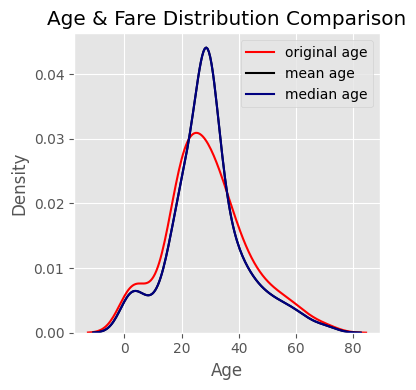

In [106]:

#! plot the age all

fig = plt.figure(figsize=(4,4))
plt.style.use('ggplot')
sns.kdeplot(x_train['Age'],color='red',label='original age')
sns.kdeplot(x_train['age mean'],color='black',label='mean age')
sns.kdeplot(x_train['age median'],color='navy',label='median age')
plt.legend()
plt.title('Age & Fare Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

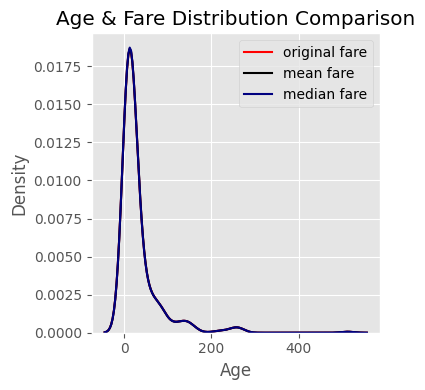

In [107]:

#! plot the fare all

fig = plt.figure(figsize=(4,4))
plt.style.use('ggplot')
sns.kdeplot(x_train['Fare'],color='red',label='original fare')
sns.kdeplot(x_train['fare mean'],color='black',label='mean fare')
sns.kdeplot(x_train['fare median'],color='navy',label='median fare')
plt.legend()
plt.title('Age & Fare Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [108]:
x_train.corr()

,Age,Family,Fare,age median,age mean,fare mean,fare median
Age,1.000000,-0.375752,0.047753,1.000000,1.000000,0.047700,0.047475
Family,-0.375752,1.000000,0.241240,-0.318877,-0.318877,0.241144,0.241553
Fare,0.047753,0.241240,1.000000,0.046405,0.046405,1.000000,1.000000
age median,1.000000,-0.318877,0.046405,1.000000,1.000000,0.046390,0.046178
age mean,1.000000,-0.318877,0.046405,1.000000,1.000000,0.046390,0.046178
fare mean,0.047700,0.241144,1.000000,0.046390,0.046390,1.000000,0.999674
fare median,0.047475,0.241553,1.000000,0.046178,0.046178,0.999674,1.000000


In [109]:
x_train.cov()

,Age,Family,Fare,age median,age mean,fare mean,fare median
Age,208.271118,-8.548107,36.822338,208.271118,208.271118,36.574967,36.419479
Family,-8.548107,2.777718,19.922939,-6.884688,-6.884688,19.827385,19.867537
Fare,36.822338,19.922939,2445.561838,29.790597,29.790597,2445.561838,2445.561838
age median,208.271118,-6.884688,29.790597,167.816275,167.816275,29.647716,29.521300
age mean,208.271118,-6.884688,29.790597,167.816275,167.816275,29.647716,29.521300
fare mean,36.574967,19.827385,2445.561838,29.647716,29.647716,2433.832525,2433.832525
fare median,36.419479,19.867537,2445.561838,29.521300,29.521300,2433.832525,2435.418111


<Axes: >

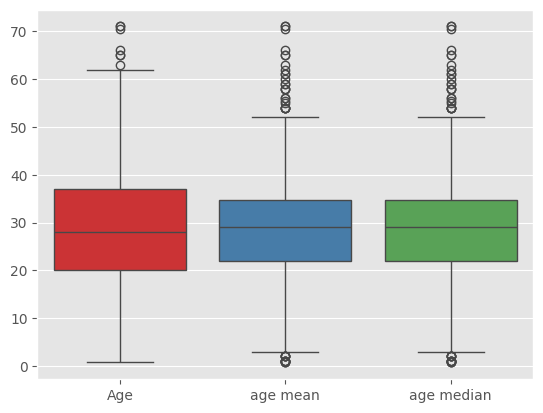

In [110]:
sns.boxplot(x_train[['Age','age mean','age median']],palette='Set1')

<Axes: >

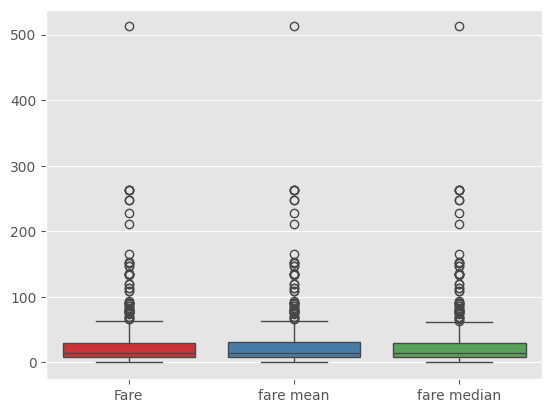

In [111]:
sns.boxplot(x_train[['Fare','fare mean','fare median']],palette='Set1')

## Implement using sklearn

In [112]:
x=d.iloc[:,[0,1,2]]
y=d.iloc[:,-1]

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)


In [114]:
x_test.shape,x_train.shape

((105, 3), (418, 3))

In [115]:
y_test.shape,y_train.shape

((105,), (418,))

In [116]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [117]:
x_train.sample(7)

,Age,Family,Fare
95,NaN,0,8.0500
348,3.0,2,15.9000
106,21.0,0,7.6500
26,NaN,0,7.2250
41,27.0,1,21.0000
127,24.0,0,7.1417
165,9.0,2,20.5250


In [118]:
level1 = ColumnTransformer([
  ('first',SimpleImputer(strategy='mean'),[0]),
  ('second',SimpleImputer(strategy='median'),[2])
    
],remainder='passthrough')

In [119]:
level2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,4))
    
    ],)

In [120]:
level3= DecisionTreeClassifier()

In [121]:
pipe = Pipeline(
    [
        ('level1',level1),
        ('level2',level2),
        ('level3',level3)
        
    ]
)

In [122]:
from sklearn.pipeline import make_pipeline
pipe2 = make_pipeline(level1,level2,level3)

In [123]:
pipe2.fit(x_train,y_train)

,steps,"[('columntransformer-1', ...), ('columntransformer-2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('first', ...), ('second', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [124]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (418, 3)
y_train shape: (418,)


In [125]:
pipe.fit(x_train,y_train)

,steps,"[('level1', ...), ('level2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('first', ...), ('second', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [126]:
y_pred = pipe2.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6666666666666666

In [128]:
y_pred=pipe.predict(x_test)

In [129]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [130]:

# cross validation

In [131]:
# x_cross = pipe.fit_transform(x)
round(np.mean(cross_val_score(pipe,x,y,cv=10)),4)

np.float64(0.6634)

In [132]:
x_train.isnull().sum()

Age       83
Family     0
Fare       4
dtype: int64